In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# 한글 폰트 설정
plt.rc('font', family='AppleGothic')

In [2]:
jeju_2017_df = pd.read_csv('data/jeju_card_region_2017.csv')
jeju_2018_df = pd.read_csv('data/jeju_card_region_2018.csv')
jeju_pop_df = pd.read_csv('data/jeju_population.csv')

In [3]:
jeju_2017_df

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2017-01-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500
1,2017-01-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400
2,2017-01-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300
3,2017-01-01,서귀포시,대정읍,기타 주점업,남성,324,71843080
4,2017-01-01,서귀포시,대정읍,기타 외국식 음식점업,남성,40,971000
...,...,...,...,...,...,...,...
26963,2017-12-01,제주시,오라동,그외 기타 스포츠시설 운영업,여성,2,11000
26964,2017-12-01,제주시,애월읍,차량용 주유소 운영업,여성,5715,354088518
26965,2017-12-01,제주시,애월읍,차량용 가스 충전업,여성,161,13180590
26966,2017-12-01,제주시,애월읍,중식 음식점업,여성,321,8899500


In [4]:
jeju_2017_df.info()

# 결측값은 없어보임
# 이용자수, 이용금액만 숫자고 나머지는 문자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26968 entries, 0 to 26967
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      26968 non-null  object
 1   시군구명    26968 non-null  object
 2   읍면동명    26968 non-null  object
 3   업종명     26968 non-null  object
 4   성별      26968 non-null  object
 5   이용자수    26968 non-null  int64 
 6   이용금액    26968 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [5]:
jeju_2017_df.describe(include='all')

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
count,26968,26968,26968,26968,26968,26968.000000,2.696800e+04
unique,12,2,43,41,2,NaN,NaN
top,2017-11-01,제주시,노형동,슈퍼마켓,남성,NaN,NaN
freq,2265,16076,795,1032,13518,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1703.495179,6.323139e+07
std,NaN,NaN,NaN,NaN,NaN,4313.160764,1.987984e+08
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000e+01
25%,NaN,NaN,NaN,NaN,NaN,43.000000,2.635000e+06
50%,NaN,NaN,NaN,NaN,NaN,281.000000,1.212517e+07
75%,NaN,NaN,NaN,NaN,NaN,1333.250000,4.905928e+07


In [6]:
# 이용금액의 값들을 소수점 표기법으로 나타내도록 설정
pd.options.display.float_format = '{:.3f}'.format

# 다시 출력
jeju_2017_df.describe(include='all')

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
count,26968,26968,26968,26968,26968,26968.000,26968.000
unique,12,2,43,41,2,NaN,NaN
top,2017-11-01,제주시,노형동,슈퍼마켓,남성,NaN,NaN
freq,2265,16076,795,1032,13518,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1703.495,63231393.341
std,NaN,NaN,NaN,NaN,NaN,4313.161,198798394.063
min,NaN,NaN,NaN,NaN,NaN,1.000,10.000
25%,NaN,NaN,NaN,NaN,NaN,43.000,2635000.000
50%,NaN,NaN,NaN,NaN,NaN,281.000,12125170.000
75%,NaN,NaN,NaN,NaN,NaN,1333.250,49059281.000


In [7]:
jeju_2018_df

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2018-01-01,제주시,아라동,차량용 주유소 운영업,남성,3954,205339045
1,2018-01-01,제주시,삼도1동,차량용 주유소 운영업,남성,490,29469792
2,2018-01-01,제주시,삼도2동,육류 소매업,여성,89,2386740
3,2018-01-01,제주시,삼도1동,스포츠 및 레크레이션 용품 임대업,남성,106,12517300
4,2018-01-01,제주시,삼도1동,수산물 소매업,남성,37,2621000
...,...,...,...,...,...,...,...
27178,2018-12-01,제주시,오라동,중식 음식점업,여성,110,3043250
27179,2018-12-01,제주시,연동,스포츠 및 레크레이션 용품 임대업,여성,2317,365724920
27180,2018-12-01,제주시,연동,호텔업,여성,810,232661992
27181,2018-12-01,제주시,오라동,기타음식료품위주종합소매업,남성,25,1225510


In [8]:
jeju_2018_df.info()

# 결측값은 없어보임
# 이용자수, 이용금액만 숫자고 나머지는 문자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27183 entries, 0 to 27182
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      27183 non-null  object
 1   시군구명    27183 non-null  object
 2   읍면동명    27183 non-null  object
 3   업종명     27183 non-null  object
 4   성별      27183 non-null  object
 5   이용자수    27183 non-null  int64 
 6   이용금액    27183 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


In [9]:
jeju_2018_df.describe(include='all')

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
count,27183,27183,27183,27183,27183,27183.000,27183.000
unique,12,2,43,41,2,NaN,NaN
top,2018-09-01,제주시,노형동,슈퍼마켓,남성,NaN,NaN
freq,2285,16228,812,1032,13645,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1726.604,62044256.570
std,NaN,NaN,NaN,NaN,NaN,4399.634,190042848.439
min,NaN,NaN,NaN,NaN,NaN,1.000,10.000
25%,NaN,NaN,NaN,NaN,NaN,45.000,2706600.000
50%,NaN,NaN,NaN,NaN,NaN,288.000,12311900.000
75%,NaN,NaN,NaN,NaN,NaN,1339.000,49426169.000


In [10]:
jeju_pop_df

,연월일,시군구명,읍면동명,성별,연령대,방문인구
0,20170101,제주시,한림읍,남,40대,19424
1,20170101,제주시,애월읍,여,20대,27747
2,20170101,제주시,구좌읍,남,70대,3459
3,20170101,제주시,조천읍,남,40대,36695
4,20170101,제주시,한경면,남,70대,1174
...,...,...,...,...,...,...
527021,20181231,서귀포시,대륜동,남,40대,22791
527022,20181231,서귀포시,대천동,여,60대,7060
527023,20181231,서귀포시,중문동,남,10세미만,6061
527024,20181231,서귀포시,중문동,여,20대,9482


In [11]:
jeju_pop_df.info()

# 결측값은 없어보임
# 연월일, 방문인구만 숫자고 나머지는 문자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527026 entries, 0 to 527025
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   연월일     527026 non-null  int64 
 1   시군구명    527026 non-null  object
 2   읍면동명    527026 non-null  object
 3   성별      527026 non-null  object
 4   연령대     527026 non-null  object
 5   방문인구    527026 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 24.1+ MB


In [12]:
jeju_pop_df.describe(include='all')

# jeju_pop_df는 jeju_2017_df, jeju_2018_df과 달리 연월일 컬럼에 '20170101' 이런식으로 숫자타입이 들어가 있음

,연월일,시군구명,읍면동명,성별,연령대,방문인구
count,527026.000,527026,527026,527026,527026,527026.000
unique,NaN,2,43,2,9,NaN
top,NaN,제주시,삼도1동,여,60대,NaN
freq,NaN,318669,12264,263533,58592,NaN
mean,20175307.456,NaN,NaN,NaN,NaN,9931.281
std,4999.286,NaN,NaN,NaN,NaN,9974.524
min,20170101.000,NaN,NaN,NaN,NaN,0.000
25%,20170620.000,NaN,NaN,NaN,NaN,3292.000
50%,20171207.000,NaN,NaN,NaN,NaN,6811.000
75%,20180526.000,NaN,NaN,NaN,NaN,12783.000


In [13]:
# jeju_2017_df와 jeju_2018_df를 서로 합치기 전에, 서로 각 column (dtype이 object인 애들중에서)마다 가지고 있는 값들이 다른게 있는지 확인 
def check_differ(a_df, b_df):
    year = a_df['연월'].str.split('-', expand=True).iloc[0,0]
    object_columns = a_df.columns[a_df.dtypes == 'object']
    for col in object_columns:
        diff_items = [] 
        if col == '연월':
            a_month_day = a_df[col].str.split('-', n=1, expand=True)[1].unique()
            b_month_day = b_df[col].str.split('-', n=1, expand=True)[1].unique()
            for month_day in a_month_day:
                if month_day not in b_month_day:
                    diff_items.append(year + '-' + month_day)
        else:
            for item in a_df[col].unique():
                if item not in b_df[col].unique():
                    diff_items.append(item)
        if len(diff_items) > 0:
            print(f'{year}년 {col}에만 있는 값과 해당 데이터 수: ')
            for diff in diff_items:
                print(f'{diff}, {a_df[a_df[col] == diff].shape[0]}개')
            print()
        
check_differ(jeju_2017_df, jeju_2018_df)
check_differ(jeju_2018_df, jeju_2017_df)

# '기타 갬블링 및 베팅업'은 2017년 데이터에만 있고, '택시 운송업'은 2018년 데이터에만 있음
# 이럴 경우 이용금액이나 이용자 수를 비교하기 어려워짐
# 하지만 해당 데이터들은 얼마 없기 때문에 삭제해도 상관 없음

2017년 업종명에만 있는 값과 해당 데이터 수: 
기타 갬블링 및 베팅업, 1개

2018년 업종명에만 있는 값과 해당 데이터 수: 
택시 운송업, 4개



In [14]:
# 서로 다른 데이터들 삭제
jeju_2017_df = jeju_2017_df[jeju_2017_df['업종명'] != '기타 갬블링 및 베팅업']
jeju_2018_df = jeju_2018_df[jeju_2018_df['업종명'] != '택시 운송업']

In [15]:
# jeju_2017_df와 jeju_2018_df 서로 다른 데이터 여부 재확인
def check_differ(a_df, b_df):
    year = a_df['연월'].str.split('-', expand=True).iloc[0,0]
    object_columns = a_df.columns[a_df.dtypes == 'object']
    for col in object_columns:
        diff_items = [] 
        if col == '연월':
            a_month_day = a_df[col].str.split('-', n=1, expand=True)[1].unique()
            b_month_day = b_df[col].str.split('-', n=1, expand=True)[1].unique()
            for month_day in a_month_day:
                if month_day not in b_month_day:
                    diff_items.append(year + '-' + month_day)
        else:
            for item in a_df[col].unique():
                if item not in b_df[col].unique():
                    diff_items.append(item)
        if len(diff_items) > 0:
            print(f'{year}년 {col}에만 있는 값과 해당 데이터 수: ')
            for diff in diff_items:
                print(f'{diff}, {a_df[a_df[col] == diff].shape[0]}개')
            print()
        
check_differ(jeju_2017_df, jeju_2018_df)
check_differ(jeju_2018_df, jeju_2017_df)

# 출력 안되는거 보니 다른 데이터들이 더이상 없음

In [16]:
# 2017과 2018 데이터 하나로 합체
# pd.concat() : 두 DataFrame 합체
jeju_df = pd.concat([jeju_2017_df, jeju_2018_df])
jeju_df

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2017-01-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500
1,2017-01-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400
2,2017-01-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300
3,2017-01-01,서귀포시,대정읍,기타 주점업,남성,324,71843080
4,2017-01-01,서귀포시,대정읍,기타 외국식 음식점업,남성,40,971000
...,...,...,...,...,...,...,...
27178,2018-12-01,제주시,오라동,중식 음식점업,여성,110,3043250
27179,2018-12-01,제주시,연동,스포츠 및 레크레이션 용품 임대업,여성,2317,365724920
27180,2018-12-01,제주시,연동,호텔업,여성,810,232661992
27181,2018-12-01,제주시,오라동,기타음식료품위주종합소매업,남성,25,1225510


In [17]:
# 연월 column의 값들을 '연도-월' 형태로 변경
jeju_df['연월'] = jeju_df['연월'].str[:7]
jeju_df

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2017-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500
1,2017-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400
2,2017-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300
3,2017-01,서귀포시,대정읍,기타 주점업,남성,324,71843080
4,2017-01,서귀포시,대정읍,기타 외국식 음식점업,남성,40,971000
...,...,...,...,...,...,...,...
27178,2018-12,제주시,오라동,중식 음식점업,여성,110,3043250
27179,2018-12,제주시,연동,스포츠 및 레크레이션 용품 임대업,여성,2317,365724920
27180,2018-12,제주시,연동,호텔업,여성,810,232661992
27181,2018-12,제주시,오라동,기타음식료품위주종합소매업,남성,25,1225510


In [18]:
# 업종별 이용자 수, 이용 금액
group_market = jeju_df.groupby(['업종명']).sum(numeric_only=True)
group_market

,이용자수,이용금액
업종명,,
건강보조식품 소매업,43738,7042351269
골프장 운영업,454602,63978385373
과실 및 채소 소매업,1088336,70647018956
관광 민예품 및 선물용품 소매업,611692,20571366644
그외 기타 분류안된 오락관련 서비스업,2361,116100063
그외 기타 스포츠시설 운영업,18761,1191623694
그외 기타 종합 소매업,920327,61397685585
기타 대형 종합 소매업,3026355,176181070237
기타 수상오락 서비스업,1188,214491300


In [19]:
# 이용자수가 많은 업종 Top 10
group_market.sort_values(by='이용자수', ascending=False).head(10)

,이용자수,이용금액
업종명,,
체인화 편의점,22577070,208385597308
한식 음식점업,18828766,764903591034
슈퍼마켓,11427536,303567124207
차량용 주유소 운영업,5683264,302282701948
서양식 음식점업,3483836,82613944504
빵 및 과자류 소매업,3295046,45801876571
기타 대형 종합 소매업,3026355,176181070237
비알콜 음료점업,2990107,32196462878
"피자, 햄버거, 샌드위치 및 유사 음식점업",2963257,38337318851


In [20]:
# 이용금액이 많은 업종 Top 10
group_market.sort_values(by='이용금액', ascending=False).head(10)

,이용자수,이용금액
업종명,,
한식 음식점업,18828766,764903591034
슈퍼마켓,11427536,303567124207
차량용 주유소 운영업,5683264,302282701948
면세점,2122760,216084015155
체인화 편의점,22577070,208385597308
기타 대형 종합 소매업,3026355,176181070237
일반유흥 주점업,541603,116184655729
스포츠 및 레크레이션 용품 임대업,991236,112011498985
정기 항공 운송업,640930,102803758104


In [21]:
# 이용자 수와 이용 금액에 차이가 있으니 인당 이용금액 Top 10도 확인
group_market['인당이용금액'] = group_market['이용금액'] / group_market['이용자수']
group_market.sort_values(by='인당이용금액', ascending=False).head(10)

,이용자수,이용금액,인당이용금액
업종명,,,
버스 운송업,5,6564000,1312800.000
일반유흥 주점업,541603,116184655729,214519.963
호텔업,261891,55612663219,212350.418
기타 주점업,262989,51724117734,196677.875
기타 수상오락 서비스업,1188,214491300,180548.232
건강보조식품 소매업,43738,7042351269,161012.192
정기 항공 운송업,640930,102803758104,160397.794
골프장 운영업,454602,63978385373,140734.940
마사지업,3621,441834050,122019.898


In [22]:
# '버스 운송업'은 이용자 수가 5명밖에 안되어서 빼도 상관 없음
jeju_df = jeju_df[jeju_df['업종명'] != '버스 운송업']
group_market = jeju_df.groupby('업종명').sum(numeric_only=True)
group_market['인당이용금액'] = group_market['이용금액'] / group_market['이용자수']
group_market.sort_values(by='인당이용금액', ascending=False).head(10)

,이용자수,이용금액,인당이용금액
업종명,,,
일반유흥 주점업,541603,116184655729,214519.963
호텔업,261891,55612663219,212350.418
기타 주점업,262989,51724117734,196677.875
기타 수상오락 서비스업,1188,214491300,180548.232
건강보조식품 소매업,43738,7042351269,161012.192
정기 항공 운송업,640930,102803758104,160397.794
골프장 운영업,454602,63978385373,140734.940
마사지업,3621,441834050,122019.898
스포츠 및 레크레이션 용품 임대업,991236,112011498985,113001.847


In [23]:
# 지역별 이용자 수, 이용 금액, 인당 이용금액 
group_area = jeju_df.groupby(['시군구명', '읍면동명']).sum(numeric_only=True).reset_index()
group_area['인당이용금액'] = group_area['이용금액'] / group_area['이용자수']
group_area

,시군구명,읍면동명,이용자수,이용금액,인당이용금액
0,서귀포시,남원읍,1209827,52349473146,43270.214
1,서귀포시,대륜동,1735095,67069487603,38654.649
2,서귀포시,대정읍,1715861,56164010423,32732.261
3,서귀포시,대천동,1221892,33847001011,27700.485
4,서귀포시,동홍동,1959703,65748200288,33550.084
5,서귀포시,서홍동,630414,14340555341,22747.838
6,서귀포시,성산읍,2361002,79796700869,33797.812
7,서귀포시,송산동,5468346,205357714141,37553.899
8,서귀포시,안덕면,2057774,69668716092,33856.350
9,서귀포시,영천동,652686,35970307258,55111.198


In [24]:
# 이용자수가 많은 지역 Top 10
group_area.sort_values(by='이용자수', ascending=False).head(10)

,시군구명,읍면동명,이용자수,이용금액,인당이용금액
19,제주시,노형동,7642921,245644045189,32140.074
27,제주시,연동,7100596,340461915654,47948.358
34,제주시,이도2동,6742075,201304448132,29857.937
31,제주시,용담2동,5820083,289912196043,49812.382
7,서귀포시,송산동,5468346,205357714141,37553.899
14,서귀포시,천지동,3683576,132477575549,35964.393
25,제주시,아라동,3653006,80280971143,21976.687
26,제주시,애월읍,3397281,120988320522,35613.280
37,제주시,일도2동,3145294,106631315225,33901.859
11,서귀포시,정방동,3053162,118137020208,38693.335


In [25]:
# 이용금액이 많은 지역 Top 10
group_area.sort_values(by='이용금액', ascending=False).head(10)

,시군구명,읍면동명,이용자수,이용금액,인당이용금액
27,제주시,연동,7100596,340461915654,47948.358
31,제주시,용담2동,5820083,289912196043,49812.382
19,제주시,노형동,7642921,245644045189,32140.074
7,서귀포시,송산동,5468346,205357714141,37553.899
34,제주시,이도2동,6742075,201304448132,29857.937
14,서귀포시,천지동,3683576,132477575549,35964.393
26,제주시,애월읍,3397281,120988320522,35613.280
13,서귀포시,중앙동,3053162,118137020208,38693.335
11,서귀포시,정방동,3053162,118137020208,38693.335
37,제주시,일도2동,3145294,106631315225,33901.859


In [26]:
# 인당 이용금액이 많은 지역 Top 10
group_area.sort_values(by='인당이용금액', ascending=False).head(10)

,시군구명,읍면동명,이용자수,이용금액,인당이용금액
10,서귀포시,예래동,1259725,72430813294,57497.321
9,서귀포시,영천동,652686,35970307258,55111.198
31,제주시,용담2동,5820083,289912196043,49812.382
27,제주시,연동,7100596,340461915654,47948.358
36,제주시,일도1동,1161659,55313193619,47615.689
23,제주시,삼도2동,1436282,63122056691,43948.233
0,서귀포시,남원읍,1209827,52349473146,43270.214
33,제주시,이도1동,1082146,45553719645,42095.724
12,서귀포시,중문동,1599439,66174146830,41373.348
30,제주시,용담1동,482871,19319580801,40009.818


In [27]:
# 인당 이용금액이 많은 지역에서 활성화된 업종 Top 5 출력
top_area = group_area.sort_values(by='인당이용금액', ascending=False).head(10)['읍면동명']
group_area_market = jeju_df.groupby(['읍면동명', '업종명']).sum(numeric_only=True).reset_index()

for area in top_area:
    area_df = group_area_market[group_area_market['읍면동명'] == area].sort_values(by='이용금액', ascending=False)
    print(area, list(area_df.head(5)['업종명']))
    print()

예래동 ['호텔업', '한식 음식점업', '차량용 주유소 운영업', '골프장 운영업', '체인화 편의점']

영천동 ['차량용 주유소 운영업', '슈퍼마켓', '한식 음식점업', '골프장 운영업', '호텔업']

용담2동 ['면세점', '한식 음식점업', '자동차 임대업', '차량용 주유소 운영업', '관광 민예품 및 선물용품 소매업']

연동 ['정기 항공 운송업', '한식 음식점업', '일반유흥 주점업', '슈퍼마켓', '체인화 편의점']

일도1동 ['스포츠 및 레크레이션 용품 임대업', '수산물 소매업', '한식 음식점업', '과실 및 채소 소매업', '체인화 편의점']

삼도2동 ['기타 대형 종합 소매업', '한식 음식점업', '호텔업', '체인화 편의점', '기타 주점업']

남원읍 ['골프장 운영업', '한식 음식점업', '차량용 주유소 운영업', '기타음식료품위주종합소매업', '휴양콘도 운영업']

이도1동 ['한식 음식점업', '그외 기타 종합 소매업', '수산물 소매업', '일반유흥 주점업', '과실 및 채소 소매업']

중문동 ['한식 음식점업', '면세점', '기타음식료품위주종합소매업', '슈퍼마켓', '체인화 편의점']

용담1동 ['한식 음식점업', '차량용 주유소 운영업', '육류 소매업', '체인화 편의점', '기타 주점업']



In [28]:
# 방문인구 Top 10 지역
jeju_pop_df.groupby('읍면동명').sum(numeric_only=True).sort_values(by='방문인구', ascending=False).head(10)

,연월일,방문인구
읍면동명,,
이도2동,247228204540,401706305
연동,247288746728,357324427
애월읍,247268565877,342324032
노형동,247329108136,335579872
아라동,247187842812,220585732
조천읍,247349289145,196158122
오라동,247268565758,190946435
용담2동,247248384963,183787396
일도2동,247409831256,171495766


In [29]:
# jeju_df와 jeju_pop_df 합쳐보기 (jeju_df에 각 성별들이 특정 날짜와 특정 지역에 얼마나 방문했는지 데이터 추가)
# jeju_df 데이터는 어떻게 생겼는지 확인
jeju_df.head(5)

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2017-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500
1,2017-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400
2,2017-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300
3,2017-01,서귀포시,대정읍,기타 주점업,남성,324,71843080
4,2017-01,서귀포시,대정읍,기타 외국식 음식점업,남성,40,971000


In [30]:
# jeju_pop_df 데이터는 어떻게 생겼는지 확인
jeju_pop_df.head(5)

# 비교해보니 '연월'과 '연월일' 통일성 필요 및 '성별' 통일성 필요

,연월일,시군구명,읍면동명,성별,연령대,방문인구
0,20170101,제주시,한림읍,남,40대,19424
1,20170101,제주시,애월읍,여,20대,27747
2,20170101,제주시,구좌읍,남,70대,3459
3,20170101,제주시,조천읍,남,40대,36695
4,20170101,제주시,한경면,남,70대,1174


In [31]:
# jeju_pop_df의 연월일을 '연도-월' 형태로 변경 후 column 이름을 '연월'로 변경
jeju_pop_df['연월일'] = jeju_pop_df['연월일'].astype('string') # astype() : 해당 column 값들의 data type 변경
jeju_pop_df['연월일'] = jeju_pop_df['연월일'].str[:4] + '-' + jeju_pop_df['연월일'].str[4:6]
jeju_pop_df.rename(columns={'연월일': '연월'}, inplace=True)
jeju_pop_df

,연월,시군구명,읍면동명,성별,연령대,방문인구
0,2017-01,제주시,한림읍,남,40대,19424
1,2017-01,제주시,애월읍,여,20대,27747
2,2017-01,제주시,구좌읍,남,70대,3459
3,2017-01,제주시,조천읍,남,40대,36695
4,2017-01,제주시,한경면,남,70대,1174
...,...,...,...,...,...,...
527021,2018-12,서귀포시,대륜동,남,40대,22791
527022,2018-12,서귀포시,대천동,여,60대,7060
527023,2018-12,서귀포시,중문동,남,10세미만,6061
527024,2018-12,서귀포시,중문동,여,20대,9482


In [32]:
# jeju_pop_df의 성별을 '남성', '여성'으로 변경
jeju_pop_df['성별'] = jeju_pop_df['성별'] + '성'
jeju_pop_df

,연월,시군구명,읍면동명,성별,연령대,방문인구
0,2017-01,제주시,한림읍,남성,40대,19424
1,2017-01,제주시,애월읍,여성,20대,27747
2,2017-01,제주시,구좌읍,남성,70대,3459
3,2017-01,제주시,조천읍,남성,40대,36695
4,2017-01,제주시,한경면,남성,70대,1174
...,...,...,...,...,...,...
527021,2018-12,서귀포시,대륜동,남성,40대,22791
527022,2018-12,서귀포시,대천동,여성,60대,7060
527023,2018-12,서귀포시,중문동,남성,10세미만,6061
527024,2018-12,서귀포시,중문동,여성,20대,9482


In [33]:
# 각 연월, 시군구명, 읍면동명, 성별의 방문인구 총합 출력
group_pop = jeju_pop_df.groupby(['연월', '시군구명', '읍면동명', '성별']).sum(numeric_only=True).reset_index()
group_pop

,연월,시군구명,읍면동명,성별,방문인구
0,2017-01,서귀포시,남원읍,남성,2844830
1,2017-01,서귀포시,남원읍,여성,2430535
2,2017-01,서귀포시,대륜동,남성,2643763
3,2017-01,서귀포시,대륜동,여성,2293711
4,2017-01,서귀포시,대정읍,남성,2346595
...,...,...,...,...,...
1973,2018-12,제주시,한경면,여성,854970
1974,2018-12,제주시,한림읍,남성,3091315
1975,2018-12,제주시,한림읍,여성,2235888
1976,2018-12,제주시,화북동,남성,3412680


In [34]:
# jeju_df와 group_pop 합체
jeju_df = pd.merge(jeju_df, group_pop, on=['연월','시군구명','읍면동명','성별'], how='left')
jeju_df

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액,방문인구
0,2017-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500,2844830.000
1,2017-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400,685754.000
2,2017-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300,2346595.000
3,2017-01,서귀포시,대정읍,기타 주점업,남성,324,71843080,2346595.000
4,2017-01,서귀포시,대정읍,기타 외국식 음식점업,남성,40,971000,2346595.000
...,...,...,...,...,...,...,...,...
54136,2018-12,제주시,오라동,중식 음식점업,여성,110,3043250,3836727.000
54137,2018-12,제주시,연동,스포츠 및 레크레이션 용품 임대업,여성,2317,365724920,7276191.000
54138,2018-12,제주시,연동,호텔업,여성,810,232661992,7276191.000
54139,2018-12,제주시,오라동,기타음식료품위주종합소매업,남성,25,1225510,4627882.000


In [35]:
jeju_df['업종명'].unique()

# 구글링을 통해 업종명들 중에서 '비알콜 음료점업'이 카페라는걸 알 수 있음

array(['건강보조식품 소매업', '기타음식료품위주종합소매업', '기타 주점업', '기타 외국식 음식점업',
       '그외 기타 종합 소매업', '그외 기타 분류안된 오락관련 서비스업', '일반유흥 주점업', '비알콜 음료점업',
       '일식 음식점업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업',
       '스포츠 및 레크레이션 용품 임대업', '체인화 편의점', '한식 음식점업', '전시 및 행사 대행업', '호텔업',
       '빵 및 과자류 소매업', '수산물 소매업', '여행사업', '여관업', '화장품 및 방향제 소매업', '욕탕업',
       '육류 소매업', '서양식 음식점업', '슈퍼마켓', '과실 및 채소 소매업', '골프장 운영업', '자동차 임대업',
       '관광 민예품 및 선물용품 소매업', '피자, 햄버거, 샌드위치 및 유사 음식점업', '휴양콘도 운영업',
       '그외 기타 스포츠시설 운영업', '기타 대형 종합 소매업', '내항 여객 운송업', '마사지업',
       '기타 수상오락 서비스업', '면세점', '정기 항공 운송업'], dtype=object)

In [36]:
# '비알콜 음료점업'의 이용 금액 높은 지역 찾기
cafe_df = jeju_df[jeju_df['업종명'] == '비알콜 음료점업']
cafe_df.groupby('읍면동명').sum(numeric_only=True).sort_values(by='이용금액', ascending=False).head(10)

,이용자수,이용금액,방문인구
읍면동명,,,
용담2동,447461,4056159850,183787396.000
이도2동,347756,3647080260,401706305.000
노형동,300088,2738692471,335579872.000
연동,216716,2387394344,357324427.000
애월읍,118980,1593771610,342324032.000
송산동,138608,1536821323,26699487.000
천지동,132038,1425763713,30105838.000
아라동,134662,1322616147,220585732.000
중앙동,95624,1102646313,70051079.000


In [37]:
# '비알콜 음료점업'의 방문 인구 높은 지역 찾기
cafe_df.groupby('읍면동명').sum(numeric_only=True).sort_values(by='방문인구', ascending=False).head(10)

# 이용금액 Top10이랑 방문 인구 Top10에서 겹치는 지역이 6개나 됨 -> 카페의 이용금액과 방문인구가 밀접한 관련이 있음

,이용자수,이용금액,방문인구
읍면동명,,,
이도2동,347756,3647080260,401706305.000
연동,216716,2387394344,357324427.000
애월읍,118980,1593771610,342324032.000
노형동,300088,2738692471,335579872.000
아라동,134662,1322616147,220585732.000
조천읍,39787,460569997,196158122.000
오라동,75154,896851980,190946435.000
용담2동,447461,4056159850,183787396.000
일도2동,41669,515231150,171495766.000


Text(0.5, 1.0, '카페 방문 인구와 카드 이용 금액')

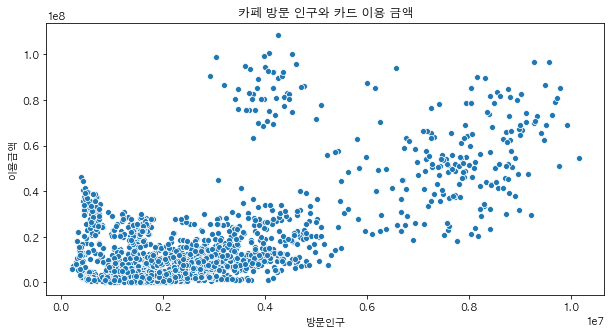

In [38]:
plt.rcParams['figure.figsize'] = (10, 5)

sns.scatterplot(data=cafe_df, x='방문인구', y='이용금액')
plt.title('카페 방문 인구와 카드 이용 금액')

# 방문인구가 커질수록 이용금액도 커짐 -> 서로 밀착한 관계가 있음 (상관관계)

In [39]:
cafe_df.corr()

,이용자수,이용금액,방문인구
이용자수,1.000,0.984,0.599
이용금액,0.984,1.000,0.633
방문인구,0.599,0.633,1.000


<AxesSubplot:>

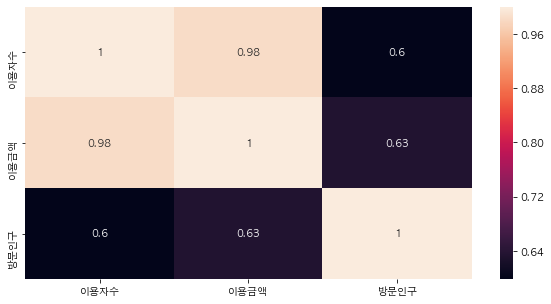

In [40]:
sns.heatmap(cafe_df.corr(), annot=True)

# 카페 이용금액과 방문인구의 pcc가 0.63 -> 뚜렷한 양의 상관관계 (방문인구가 증가하면 이용금액도 증가)

Text(0.5, 1.0, '전체 업종의 방문 인구와 카드 이용 금액')

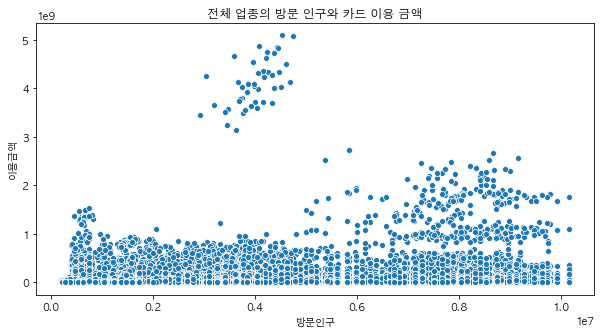

In [41]:
sns.scatterplot(data=jeju_df, x='방문인구', y='이용금액')
plt.title('전체 업종의 방문 인구와 카드 이용 금액')

# 카페와는 다르게 전체 업종은 방문인구와 이용금액이 뚜렷하게 상관관계가 있지 않음

<AxesSubplot:>

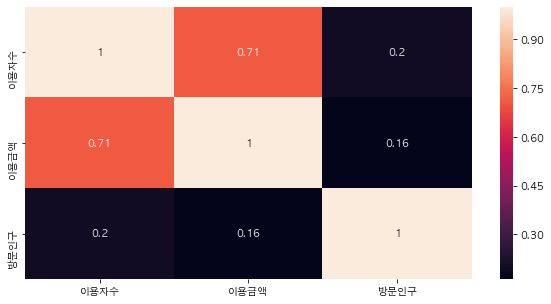

In [42]:
sns.heatmap(jeju_df.corr(), annot=True)

# 전체 업종의 이용금액과 방문인구의 pcc가 0.16 -> 전체적으로 보면 두 변수는 약한 상관관계
# 카페가 유독 이용금액과 방문인구 상관관계가 좋기 때문에 유동인구가 많은 지역이 카페 영업을 하기 좋다는걸 알 수 있음 